In [263]:
import pandas as pd

In [264]:
import matplotlib.pyplot as plt

In [265]:
import seaborn as sns

In [266]:
import re
import numpy as np

In [267]:
import os

In [268]:
def data_segregation(df):
    global string, numeric,col
    string=df.select_dtypes(include="object")
    numeric=df.select_dtypes(include="number")
    string=pd.DataFrame(string)
    numeric=pd.DataFrame(numeric)
    col=numeric.columns
    numeric = numeric.apply(pd.to_numeric, downcast="integer")
    numeric = numeric.apply(pd.to_numeric, downcast="float")
    string=string.apply(pd.to_numeric, downcast="object")

In [269]:
file=input("Enter the path of the file (use CNTRL+SHIFT+C to copy path): ").strip()
file = file.strip('"').strip("'")  # Remove surrounding quotes
file = os.path.abspath(file)  # Normalize path
print(f"Debug: Processed file path - {file}")
        

Enter the path of the file (use CNTRL+SHIFT+C to copy path):  e


Debug: Processed file path - C:\Users\Gursimar Singh Phull\e


In [271]:
# path=path.strip()


In [272]:
 # path=r"path"

In [273]:
if file.endswith(".xlsx"):
    df=pd.read_xlsx(file)
else:
    df=pd.read_csv(file)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Gursimar Singh Phull\\e'

In [274]:
data_segregation(df)

In [275]:
print(f"your numeric data looks like \n {numeric.head(5)} \n your object data looks like \n {string.head(5)}")

your numeric data looks like 
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target   Z_SCORE  
0   0     1       1  1.295017  
1   0     2       1  0.990878  
2   0     2       1  0.809660  
3   0     2       1  0.714321  
4   0     2       1  0.945431   
 your object data looks like 
 Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [276]:
numeric=numeric.drop_duplicates()

In [277]:
string=string.drop_duplicates()

In [278]:
from sklearn.preprocessing import  MinMaxScaler

In [279]:
scaler=MinMaxScaler()

In [280]:
numeric=pd.DataFrame(scaler.fit_transform(numeric))

In [281]:
numeric.columns=col # making the column easy 


In [282]:
print(f"your data is transformed into numeric values to make it moreadvance to the machine \n { numeric.head(5)}")

your data is transformed into numeric values to make it moreadvance to the machine 
         age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333  1.0  1.000000  0.481132  0.244292  1.0      0.0  0.603053    0.0   
1  0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.5  0.885496    0.0   
2  0.250000  0.0  0.333333  0.339623  0.178082  0.0      0.0  0.770992    0.0   
3  0.562500  1.0  0.333333  0.245283  0.251142  0.0      0.5  0.816794    0.0   
4  0.583333  0.0  0.000000  0.245283  0.520548  0.0      0.5  0.702290    1.0   

    oldpeak  slope   ca      thal  target   Z_SCORE  
0  0.370968    0.0  0.0  0.333333     1.0  0.556360  
1  0.564516    0.0  0.0  0.666667     1.0  0.306862  
2  0.225806    1.0  0.0  0.666667     1.0  0.158201  
3  0.129032    1.0  0.0  0.666667     1.0  0.079991  
4  0.096774    1.0  0.0  0.666667     1.0  0.269580  


In [283]:
q1= numeric.quantile(0.25)
q3=numeric.quantile(0.75)
iqr=q3-q1


Text(0.5, 1.0, ' BEFORE CLEANING')

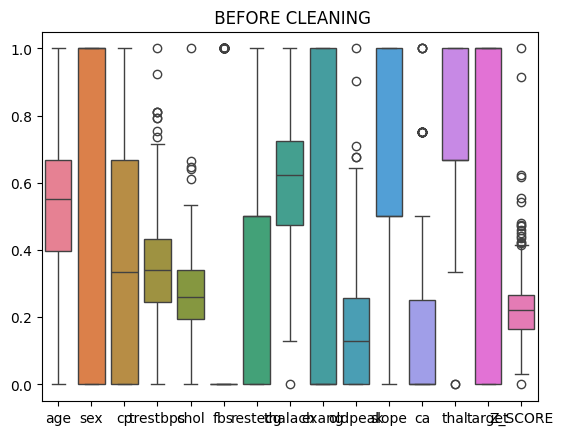

In [284]:
sns.boxplot(data=numeric)
plt.title(' BEFORE CLEANING')


In [285]:
numeric=numeric[~((numeric > (q1- 1.5*iqr)) | (numeric < (q1+ 1.5*iqr)))] 

In [286]:
numeric = df.select_dtypes(include="number")  # Ensure it remains a DataFrame

numeric = numeric.clip(lower=(q1 - 1.5 * iqr), upper=(q3 + 1.5 * iqr), axis=1)
 


Text(0.5, 1.0, 'AFTER CLEANING')

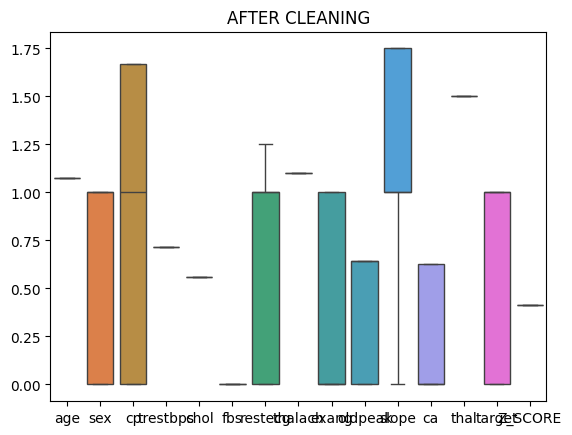

In [287]:
sns.boxplot(data=numeric,showfliers=False)
plt.title('AFTER CLEANING')

In [288]:
# re moved identifier now further cleaning starts now ( advance mode)
Z_SCORE=((numeric-numeric.median())/numeric.std()) 


In [289]:
mean_vals = numeric.mean()
std_vals = numeric.std()



In [290]:
# Replace zero standard deviations with NaN to avoid division by zero
std_vals[std_vals == 0] = np.nan  

In [291]:
# Apply Z-score normalization for each numeric column
z_scores = (numeric - mean_vals) / std_vals  
# Take absolute values to ensure all Z-scores are positive
z_scores = z_scores.abs()   




In [292]:
# Compute final Z-score as the mean of all feature Z-scores
numeric["Z_SCORE"] = z_scores.mean(axis=1)


In [293]:
numeric=numeric.query("Z_SCORE <3")

In [294]:
numeric

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Z_SCORE
0,1.072917,1,1.666667,0.716981,0.557934,0,0.0,1.100191,0,0.645161,0.00,0.000,1.0,1,1.295017
1,1.072917,1,1.666667,0.716981,0.557934,0,1.0,1.100191,0,0.645161,0.00,0.000,1.5,1,0.990878
2,1.072917,0,1.000000,0.716981,0.557934,0,0.0,1.100191,0,0.645161,1.75,0.000,1.5,1,0.809660
3,1.072917,1,1.000000,0.716981,0.557934,0,1.0,1.100191,0,0.645161,1.75,0.000,1.5,1,0.714321
4,1.072917,0,0.000000,0.716981,0.557934,0,1.0,1.100191,1,0.600000,1.75,0.000,1.5,1,0.945431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1.072917,0,0.000000,0.716981,0.557934,0,1.0,1.100191,1,0.200000,1.00,0.000,1.5,0,0.916128
299,1.072917,1,1.666667,0.716981,0.557934,0,1.0,1.100191,0,0.645161,1.00,0.000,1.5,0,0.790319
300,1.072917,1,0.000000,0.716981,0.557934,0,1.0,1.100191,0,0.645161,1.00,0.625,1.5,0,0.806734
301,1.072917,1,0.000000,0.716981,0.557934,0,1.0,1.100191,1,0.645161,1.00,0.625,1.5,0,0.888693


In [295]:
indexx=input("enter the column u want to be relating with ")
 


enter the column u want to be relating with  1


In [296]:
col 



Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'Z_SCORE'],
      dtype='object')

In [244]:
start=int(input("enter the index value of column of u want to start the column with"))


enter the index value of column of u want to start the column with 1


In [245]:

endie=int(input("enter the index value of column of u want to end  the table with"))

enter the index value of column of u want to end  the table with -1


In [297]:
valuee=col[start:endie]

In [298]:
index = col[start]  # Single index column
valuee = col[start+1:endie]  # Value columns



In [299]:
print("Fixed Index Column:", index)

Fixed Index Column: sex


In [300]:
print("Fixed Value Columns:", valuee)

Fixed Value Columns: Index(['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [301]:
numeric.pivot_table(index=index, values=valuee, aggfunc=("sum", "median"))




ca            chol                 cp              exang        fbs  \
    median   sum    median         sum median         sum median sum median   
sex                                                                           
0      0.0  20.0  0.557934   53.561647    1.0   83.000002    0.0  22    0.0   
1      0.0  60.0  0.557934  115.492301    0.0  150.333337    0.0  77    0.0   

         ...  slope        target       thal               thalach  \
    sum  ... median    sum median sum median         sum    median   
sex      ...                                                         
0     0  ...    1.0  125.5    1.0  72    1.5  142.166664  1.100191   
1     0  ...    1.0  263.0    0.0  93    1.5  300.666661  1.100191   

                 trestbps              
            sum    median         sum  
sex                                    
0    105.618319  0.716981   68.830187  
1    227.739499  0.716981  148.415090  

[2 rows x 24 columns]

In [302]:
print("plot the respectiv egraph u want to plot and you will be done")

plot the respectiv egraph u want to plot and you will be done
